In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout

In [2]:
train_data=pd.read_csv(r"E:\transfer learning\archive22\Google_Stock_Price_Train.csv")

In [3]:
train_data

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [4]:
train_data.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [5]:
training_set = train_data.iloc[:, 1:2].values

In [6]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [7]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [8]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [9]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1),activation="tanh"))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True,activation="tanh"))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True,activation="tanh"))
model.add(Dropout(0.2))
model.add(LSTM(units=50,activation="tanh"))
model.add(Dropout(0.2))
model.add(Dense(units=1,activation="sigmoid"))

In [10]:
model.compile(optimizer='adam',loss='mean_squared_error')

lstm_model=model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 7s 59ms/step - loss: 0.0221
Epoch 2/100
38/38 [==============================] - 2s 62ms/step - loss: 0.0046
Epoch 3/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0033
Epoch 4/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0029
Epoch 5/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0026
Epoch 6/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0027
Epoch 7/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0025
Epoch 8/100
38/38 [==============================] - 2s 63ms/step - loss: 0.0024: 0s - loss: 0.002
Epoch 9/100
38/38 [==============================] - 2s 63ms/step - loss: 0.0026
Epoch 10/100
38/38 [==============================] - 2s 63ms/step - loss: 0.0022
Epoch 11/100
38/38 [==============================] - 2s 63ms/step - loss: 0.0022
Epoch 12/100
38/38 [==============================] - 2s 64ms/step - loss: 0.0022
Epoch 1

In [11]:
test_data=pd.read_csv(r'E:\transfer learning\archive22\Google_Stock_Price_Test.csv')
real_stock_price=test_data.iloc[:, 1:2].values

In [12]:
dataset_total=pd.concat((train_data['Open'], test_data['Open']), axis = 0)
inputs=dataset_total[len(dataset_total) - len(test_data) - 60:].values

In [13]:
inputs

array([779.  , 779.66, 777.71, 786.66, 783.76, 781.22, 781.65, 779.8 ,
       787.85, 798.24, 803.3 , 795.  , 804.9 , 816.68, 806.34, 801.  ,
       808.35, 795.47, 782.89, 778.2 , 767.25, 750.66, 774.5 , 783.4 ,
       779.94, 791.17, 756.54, 755.6 , 746.97, 755.2 , 766.92, 771.37,
       762.61, 772.63, 767.73, 764.26, 760.  , 771.53, 770.07, 757.44,
       744.59, 757.71, 764.73, 761.  , 772.48, 780.  , 785.04, 793.9 ,
       797.4 , 797.34, 800.4 , 790.22, 796.76, 795.84, 792.36, 790.9 ,
       790.68, 793.7 , 783.33, 782.75, 778.81, 788.36, 786.08, 795.26,
       806.4 , 807.86, 805.  , 807.14, 807.48, 807.08, 805.81, 805.12,
       806.91, 807.25, 822.3 , 829.62, 837.81, 834.71, 814.66, 796.86])

In [14]:
inputs=inputs.reshape(-1,1)

In [15]:
inputs

array([[779.  ],
       [779.66],
       [777.71],
       [786.66],
       [783.76],
       [781.22],
       [781.65],
       [779.8 ],
       [787.85],
       [798.24],
       [803.3 ],
       [795.  ],
       [804.9 ],
       [816.68],
       [806.34],
       [801.  ],
       [808.35],
       [795.47],
       [782.89],
       [778.2 ],
       [767.25],
       [750.66],
       [774.5 ],
       [783.4 ],
       [779.94],
       [791.17],
       [756.54],
       [755.6 ],
       [746.97],
       [755.2 ],
       [766.92],
       [771.37],
       [762.61],
       [772.63],
       [767.73],
       [764.26],
       [760.  ],
       [771.53],
       [770.07],
       [757.44],
       [744.59],
       [757.71],
       [764.73],
       [761.  ],
       [772.48],
       [780.  ],
       [785.04],
       [793.9 ],
       [797.4 ],
       [797.34],
       [800.4 ],
       [790.22],
       [796.76],
       [795.84],
       [792.36],
       [790.9 ],
       [790.68],
       [793.7 ],
       [783.33

In [16]:
inputs=sc.transform(inputs)

In [17]:
X_test=[]
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test=np.array(X_test)
X_test=np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [18]:
predicted_stock_price=model.predict(X_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

In [19]:
predicted_stock_price

array([[780.8764 ],
       [779.6036 ],
       [780.35565],
       [780.74536],
       [781.91144],
       [784.48846],
       [786.25574],
       [786.528  ],
       [787.0049 ],
       [787.80853],
       [788.4509 ],
       [788.7822 ],
       [789.04193],
       [789.6133 ],
       [790.1661 ],
       [792.3689 ],
       [794.7575 ],
       [796.7911 ],
       [797.67365],
       [796.3247 ]], dtype=float32)

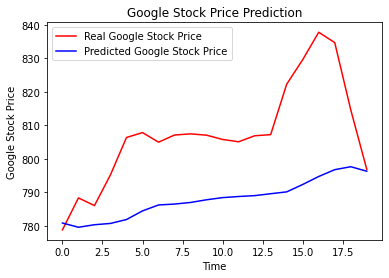

In [20]:
plt.plot(real_stock_price, color='red',label='Real Google Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [21]:
##saving the keras model.
model.save('Google_lstm.h5')